IMPORTAÇÃO DE BIBLIOTECAS

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from perceptron import *

LEITURA DO DATASET

In [143]:
# Leitura do arquivo dataAll.txt
data = np.fromfile("datasets/dataAll.txt", dtype=float)
print(data.shape)

(3000,)


TRATAMENTO DO DATASET

In [144]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(1000, 3)



In [145]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(1000,)


In [155]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(1000, 3)


APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [156]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[-0.28089172 -0.2494007   0.25593758]


In [157]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca = treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta)

[-0.28089172 -0.2494007   0.25593758]
Pesos:  [ -0.18089172  36.1294393  -24.15829242]
Pesos:  [-8.08917228e-02 -1.75296107e+01 -1.00654042e+02]
Pesos:  [ -0.18089172  55.2664093  -64.82448242]
Pesos:  [ -0.28089172 137.8651093   15.03134758]
Pesos:  [ -0.18089172 143.7108693  -63.26324242]
Pesos:  [-8.08917228e-02  1.03701959e+02 -1.41155932e+02]
Pesos:  [ 1.91082772e-02  1.57371769e+02 -9.20636624e+01]
Pesos:  [-8.08917228e-02  1.04411709e+02 -1.48933122e+02]
Pesos:  [ 1.91082772e-02  1.63971229e+02 -9.88107924e+01]
Pesos:  [-8.08917228e-02  1.18446599e+02 -1.64446722e+02]
Pesos:  [ 1.91082772e-02  2.09162459e+02 -8.97334024e+01]
Pesos:  [-8.08917228e-02  1.51381469e+02 -1.50041552e+02]
Pesos:  [-1.80891723e-01  1.03114909e+02 -1.98511272e+02]
Pesos:  [  -0.28089172  173.5622593  -156.39500242]
Pesos:  [  -0.38089172  126.7202593  -207.80487242]
Pesos:  [  -0.48089172  196.5838893  -143.58593242]
Pesos:  [  -0.38089172  140.7481593  -199.76346242]
Pesos:  [  -0.48089172  217.7356293 

In [158]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  5
Pesos finais:  [  -0.78089172  323.1596293  -323.25490242]
Total de ajustes de pesos: 165


GRÁFICO DA SOLUÇÃO

In [159]:
# Criando a lista de cores
cores = criar_cores(saidas)
# Cálculo dos coeficientes da linha de decisão
b = pesos[0]/pesos[2]
a = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = int(math.ceil(min(entradas[:,1])))
maior = int(math.ceil(max(entradas[:,1])))
for i in range(menor, maior, 1):
    x.append(i)
    valor = b + a*(i)
    y.append(valor)
print(a, b)

0.999705269380033 0.0024157150192428865


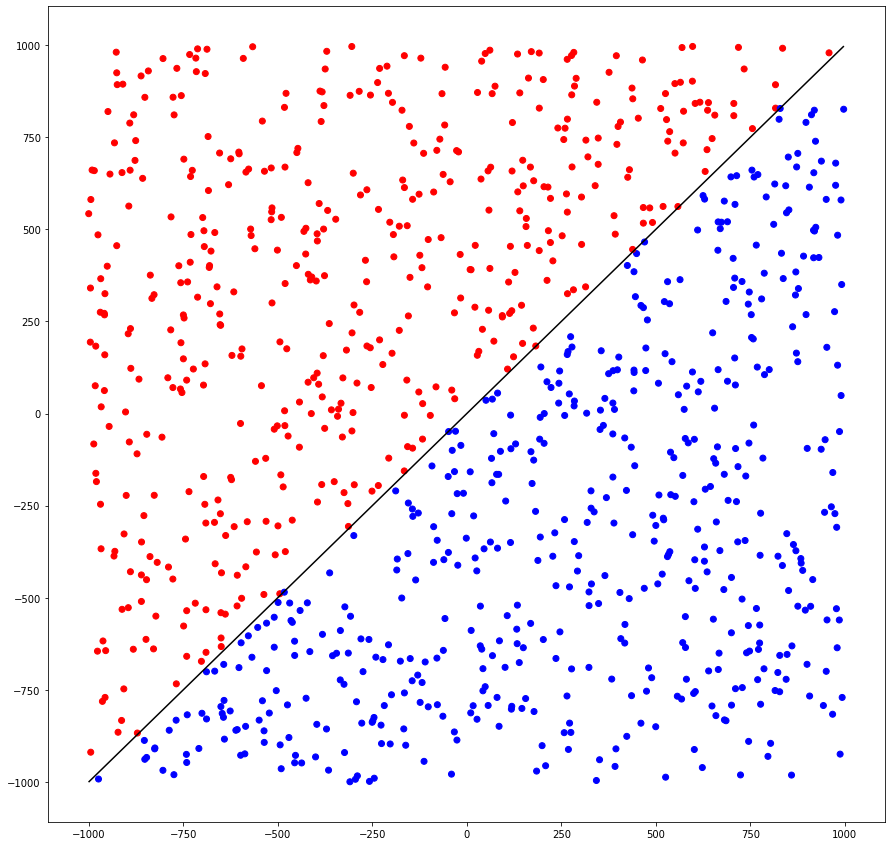

In [160]:
# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.pyplot.plot(x, y, color="black", markersize=100)
plt.pyplot.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.pyplot.show()

FUNÇÕES

In [161]:
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

In [162]:
def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

In [163]:
def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores